## Heart Disease Prediction

The goal of this project is to predict heart disease.
<br>
The idea is to predict the value of 'target' variable where 0 indicates no heart disease and 1 indicates there is a possibility of heart disease

Heart disease is going to be predicted by using Decision Tree Classifier as a classification problem

The following steps were performed to build a classifier that predicts the heart disease:
1. Load the data set
2. Plot the graphs for some features
3. Split the training and test data sets with 70% and 30% of data respectively
4. Define the decision tree classifier
5. Get the metrics for the classifier created
6. Plot the classifer
7. Use entropy as criterion to modify attribute selection measure as entropy
8. Get the metrics for the new classifier
9. Plot the new classifier
10. Perform 5-fold cross validation on decision tree to see if accuracy improves

In [1]:
# Importing all the necessary libraries that would be used
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six 
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.model_selection import cross_val_score

### Load the dataset

The file 'heart.csv' is the dataset going to used for prediction

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Plotting histograms

Histograms are plotted for features age, sex and cp

#### Age

<AxesSubplot:>

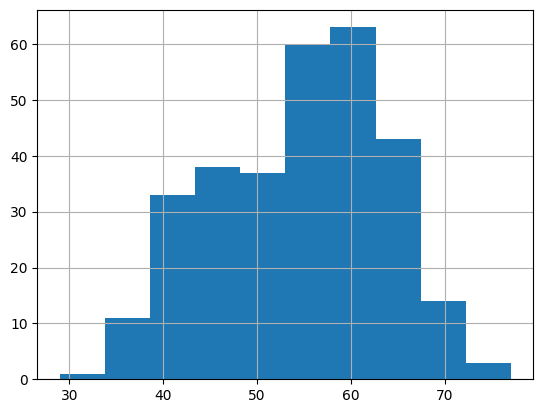

In [4]:
data['age'].hist()

#### Sex

<AxesSubplot:>

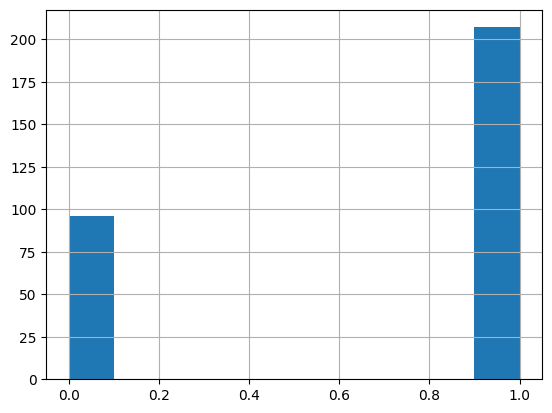

In [5]:
data['sex'].hist()

#### cp

<AxesSubplot:>

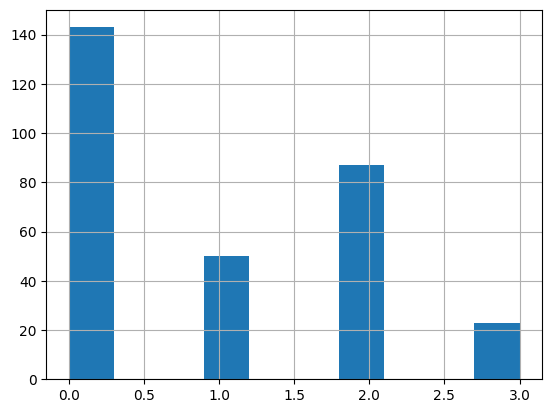

In [6]:
data['cp'].hist()

### Features and target variables

Features are the independent variables and target variables are the dependent variables which are predicted using the independent variables

In the given dataset, features are age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca and thal.
<br>
Target variable is 'target'

In [7]:
features = [x for x in list(data) if x != 'target']
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

X contains the data of independent variables and Y contains data of dependent variables

In [8]:
X = data[features]
Y = data.target

### Splitting training and test data

The dataset is split in such a way that 70% of it is training data and 30% of it is test data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Defining the classifier

Decision Tree classifier is defined. It is fit with the training data obtained from previous step 
<br>
Prediction is done on the test data

In [10]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

### Metrics

Accuracy metrics are calculated based on the predicted data and test data as accuracy, precision and recall

In [11]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(accuracy)

0.7472527472527473


In [12]:
precision = metrics.precision_score(Y_test, Y_pred)
print(precision)

0.813953488372093


In [13]:
recall = metrics.recall_score(Y_test, Y_pred)
print(recall)

0.7


### Plotting the classifier

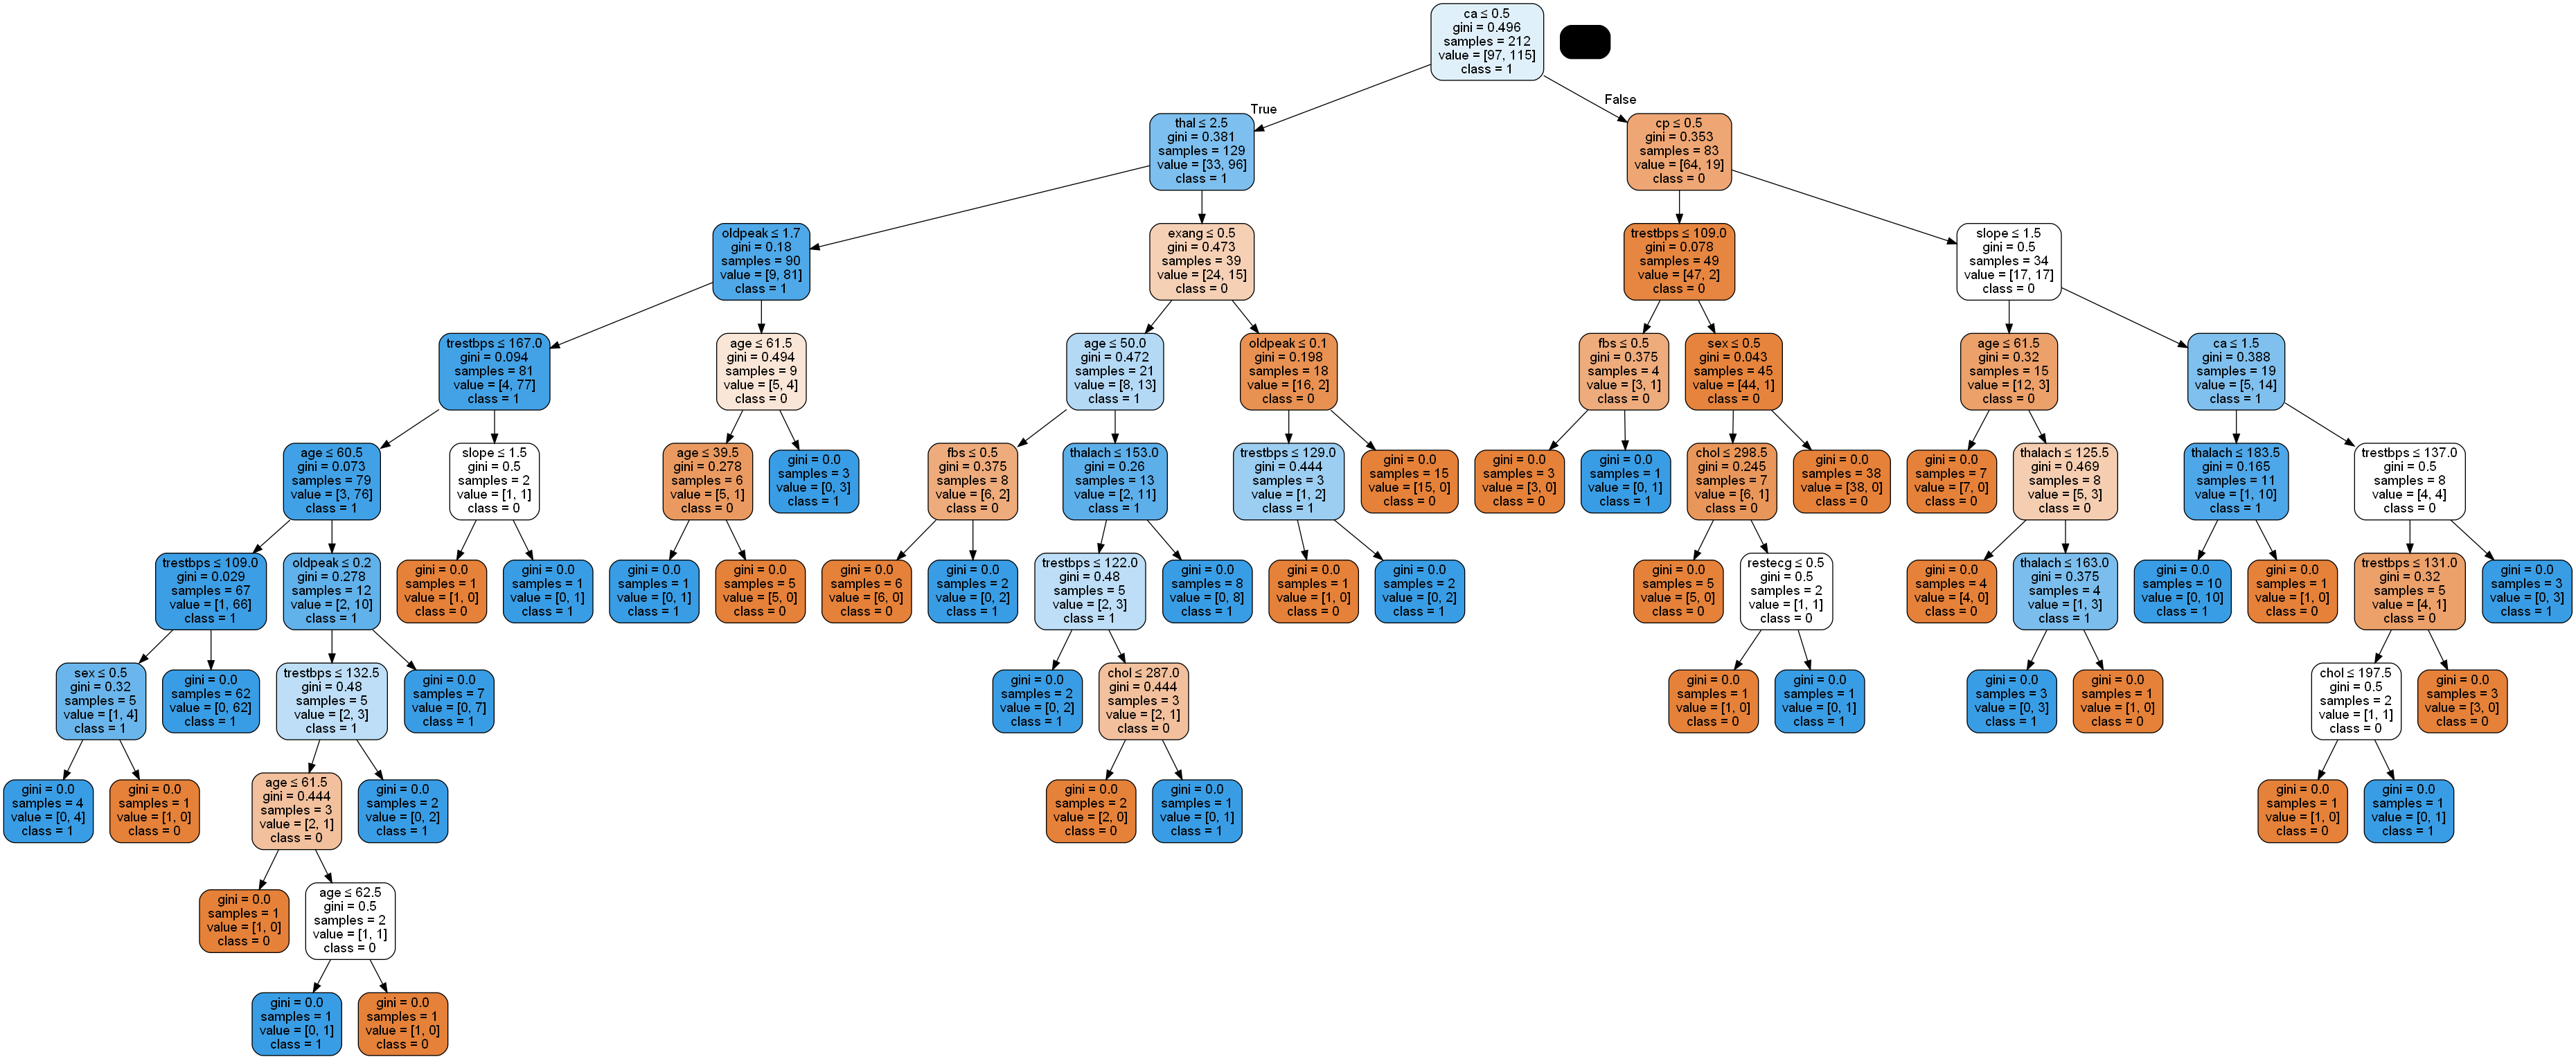

In [14]:
dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
               special_characters=True, feature_names=features,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart_disease.png')
Image(graph.create_png())

### Defining classifier using entropy

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. 

By default, the selection criterion is gini index. Entropy is now set as selection criterion to improve the accuracy

In [15]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf1 = clf1.fit(X_train, Y_train)
Y_pred = clf1.predict(X_test)

### Metrics

In [16]:
accuracy_entropy = metrics.accuracy_score(Y_test, Y_pred)
print(accuracy_entropy)

0.7692307692307693


In [17]:
precision_entropy = metrics.precision_score(Y_test, Y_pred)
print(precision_entropy)

0.8085106382978723


In [18]:
recall_entropy = metrics.recall_score(Y_test, Y_pred)
print(recall_entropy)

0.76


### Plotting the classifier

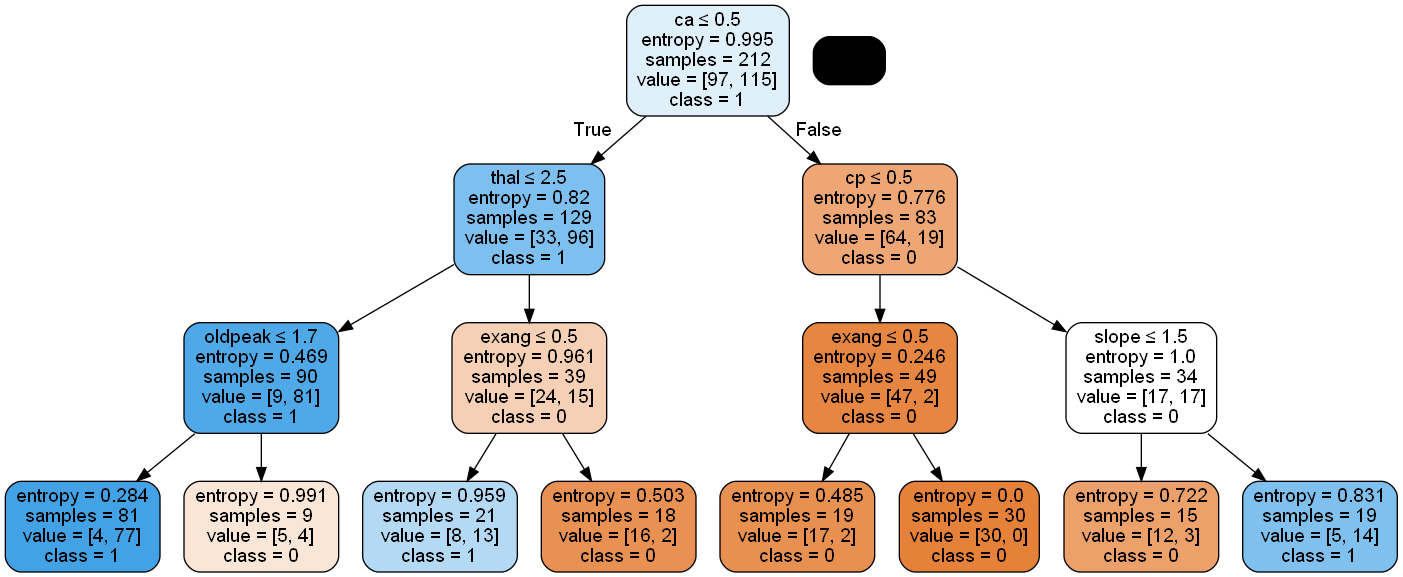

In [19]:
dot_data = six.StringIO()
export_graphviz(clf1, out_file=dot_data, filled=True, rounded=True,
               special_characters=True, feature_names=features,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart_disease.png')
Image(graph.create_png())

### 5-fold cross validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
<br>
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

In [20]:
depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=5, n_jobs=4)
    depth.append(scores.mean())
accuracy_cv = np.array(depth).mean()
print(accuracy_cv)

0.7623240115718419


### Conclusion

The accuracy of the decision classifier constructed is as follows:

In [21]:
print("Accuracy of the decision tree classifier: {0}".format(accuracy * 100))
print("Accuracy of the decision tree classifier with entropy as selection criterion: {0}".format(accuracy_entropy * 100))
print("Accuracy of the decision tree classifier with k-fold cross validation: {0}".format(accuracy_cv * 100))

Accuracy of the decision tree classifier: 74.72527472527473
Accuracy of the decision tree classifier with entropy as selection criterion: 76.92307692307693
Accuracy of the decision tree classifier with k-fold cross validation: 76.2324011571842
